# **Question 1**

In [21]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


In [22]:
#import dataset
df=pd.read_csv('/content/energy.csv')
print(df.head(12))

      X1     X2     X3      X4   X5  X6   X7  X8     Y1
0   0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55
1   0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55
2   0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55
3   0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55
4   0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84
5   0.90  563.5  318.5  122.50  7.0   3  0.0   0  21.46
6   0.90  563.5  318.5  122.50  7.0   4  0.0   0  20.71
7   0.90  563.5  318.5  122.50  7.0   5  0.0   0  19.68
8   0.86  588.0  294.0  147.00  7.0   2  0.0   0  19.50
9   0.86  588.0  294.0  147.00  7.0   3  0.0   0  19.95
10  0.86  588.0  294.0  147.00  7.0   4  0.0   0  19.34
11  0.86  588.0  294.0  147.00  7.0   5  0.0   0  18.31


## 1.Preprocess the data. Split it using a 70:10:20 ratio, which represents training:validation:testing.

### pre-processing

#### missing values

In [23]:
print(df.isnull().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
dtype: int64


**no null values present, so we proceed further.**

#### encoding categorical data

In [24]:
print(df.dtypes)

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object


**As no column has datatype as object so we do not need to do categorical encoding.**

#### overall distribution

In [25]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


#### visualization

Text(0.5, 1.0, 'x8')

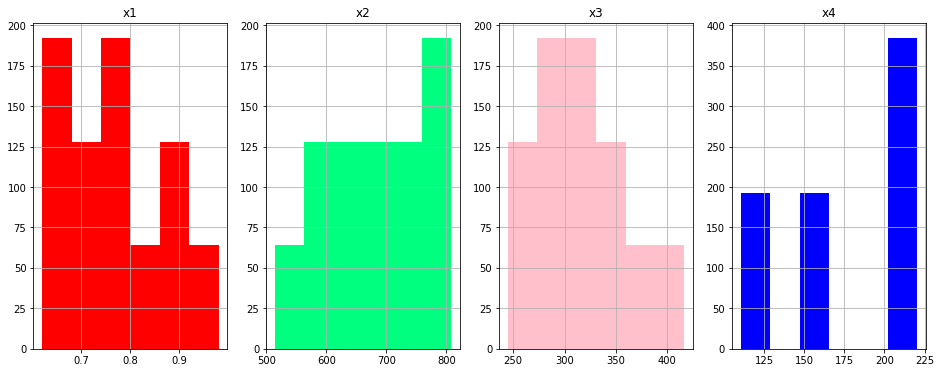

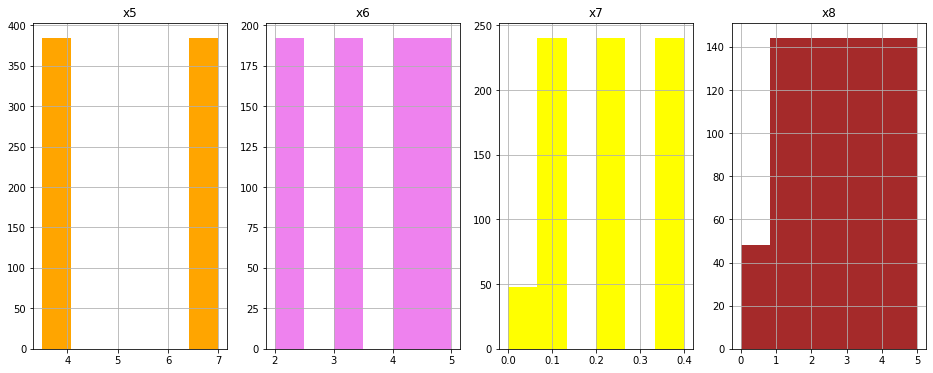

In [26]:
#analysis of sepal length for different species using histogram
figure, axes = plt.subplots(1, 4, figsize=(16,6))
df['X1'].hist(bins=6,ax=axes[0],color='red')
df['X2'].hist(bins=6,ax=axes[1],color='springgreen')
df['X3'].hist(bins=6,ax=axes[2],color='pink')
df['X4'].hist(bins=6,ax=axes[3],color='blue')
axes[0].set_title('x1')
axes[1].set_title('x2')
axes[2].set_title('x3')
axes[3].set_title('x4')
figure, axes = plt.subplots(1, 4, figsize=(16,6))
df['X5'].hist(bins=6,ax=axes[0],color='orange')
df['X6'].hist(bins=6,ax=axes[1],color='violet')
df['X7'].hist(bins=6,ax=axes[2],color='yellow')
df['X8'].hist(bins=6,ax=axes[3],color='brown')
axes[0].set_title('x5')
axes[1].set_title('x6')
axes[2].set_title('x7')
axes[3].set_title('x8')


#### scaling

In [27]:
scaler = MinMaxScaler()
df.iloc[:,:-1]=scaler.fit_transform(df.iloc[:,:-1])

In [28]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,15.55
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,15.55
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,15.55
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,15.55
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,17.88
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,16.54
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,16.44
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,16.48


### splitting

In [29]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
#now among the 30% of x_test x_validation will be 33.33% as 10 out of 30
x_validate,x_test,y_validate,y_test=train_test_split(x_test,y_test,train_size=1/3,random_state=1)

In [31]:
print("Training Size :",round(x_train.shape[0]/len(df)*100),'%')
print("Validation Size :",round(x_validate.shape[0]/len(df)*100),'%')
print("Testing Size :",round(x_test.shape[0]/len(df)*100),'%')

Training Size : 70 %
Validation Size : 10 %
Testing Size : 20 %


## 2.Write a function to train the data using a regression decision tree. The function varies hyper-parameters to find the tree that generalizes best (based on its performance on the validation set). So, you need to train on the 70% training data and check performance on the 10% validation data. Properly explain the thought process behind which hyper-parameters you vary and the expected effects in the report. Make plots of validation MSE to support your arguments.

### Firstly we train our data using the regression decision tree

In [32]:
def train_model(x,y,regressor):
  regressor.fit(x,y) 
  return regressor
regressor=DecisionTreeRegressor()
regressor=train_model(x_train,y_train,regressor)
regressor

DecisionTreeRegressor()

In [33]:
#we see the score of the default model
print(regressor.score(x_validate,y_validate)*100,'%')

99.52442466877491 %


### Now, we write a function to test our model on different hyperparameters

In [34]:
def validate_data(x_train,y_train,x_validate,y_validate):
  max_depth=(np.arange(1,len(x_train.columns),1)).tolist()
  max_leaf_nodes=np.arange(2,len(x_train),1).tolist()
  max_features=(np.arange(1,len(x_train.columns),1)).tolist()
  maximum_depth={}
  maximum_leaves={}
  maximum_features={}
  for i in max_depth:
    regressor=DecisionTreeRegressor(max_depth=i)
    regressor=train_model(x_train,y_train,regressor)
    maximum_depth[i]=regressor.score(x_validate,y_validate)
  for i in max_leaf_nodes:
    regressor=DecisionTreeRegressor(max_leaf_nodes=i)
    regressor=train_model(x_train,y_train,regressor)
    maximum_leaves[i]=regressor.score(x_validate,y_validate)
  for i in max_features:
    regressor=DecisionTreeRegressor(max_features=i)
    regressor=train_model(x_train,y_train,regressor)
    maximum_features[i]=regressor.score(x_validate,y_validate)
  return maximum_depth,maximum_leaves,maximum_features
max_depth,max_leaf_nodes,max_features=validate_data(x_train,y_train,x_validate,y_validate)

In [35]:
print(max_depth)
print(max_leaf_nodes)
print(max_features)

{1: 0.7270128896921103, 2: 0.8522229439175296, 3: 0.9316109100663016, 4: 0.973928686545706, 5: 0.9906883085145342, 6: 0.9973985999896138, 7: 0.9968951222404681}
{2: 0.7270128896921103, 3: 0.8418753934362602, 4: 0.8879052191034934, 5: 0.8982527695847629, 6: 0.9204070959617727, 7: 0.9280351745150766, 8: 0.9552492776382342, 9: 0.9607628137022926, 10: 0.962842263463637, 11: 0.9671208755046672, 12: 0.9706966110558922, 13: 0.9733197848040333, 14: 0.9739073634931783, 15: 0.9755617704300781, 16: 0.9773380120218496, 17: 0.977665999135596, 18: 0.9790467274744121, 19: 0.9810343054218507, 20: 0.9849559942464537, 21: 0.9863837957840269, 22: 0.9872887424625759, 23: 0.9883846344267891, 24: 0.9887962780451186, 25: 0.9893473456811966, 26: 0.9908254238182292, 27: 0.9910588727596097, 28: 0.9913683874359136, 29: 0.9915226102523107, 30: 0.9934922211342232, 31: 0.9942110285639537, 32: 0.9971437624514553, 33: 0.9971346864371887, 34: 0.9973803428559291, 35: 0.9973859637685314, 36: 0.9974504810817125, 37: 0.99

In [36]:
list_of_max_depth=list(max_depth.keys())
max=max_depth[list_of_max_depth[0]]
max_index=list_of_max_depth[0]
for i in list_of_max_depth:
  if(max_depth[i]>max):
    max=max_depth[i]
    max_index=i
print(max_index,max*100,"%")

6 99.73985999896138 %


In [37]:
list_of_max_leaf_nodes=list(max_leaf_nodes.keys())
max=max_leaf_nodes[list_of_max_leaf_nodes[0]]
max_index=list_of_max_leaf_nodes[0]
for i in list_of_max_leaf_nodes:
  if(max_leaf_nodes[i]>max):
    max=max_leaf_nodes[i]
    max_index=i
print(max_index,max*100,"%")

45 99.79307780680001 %


In [38]:
list_of_max_features=list(max_features.keys())
max=max_features[list_of_max_features[0]]
max_index=list_of_max_features[0]
for i in list_of_max_features:
  if(max_features[i]>max):
    max=max_features[i]
    max_index=i
print(max_index,max*100,"%")

7 99.5463454373038 %


### So individually the best score on validation data comes with max_depth=6,max_features=7 and max_leaf_nodes=45

###Now we consider the problem with all these 3 features combined together

In [39]:
def get_score(max_depth,max_leaf_nodes,max_features):
  regressor=DecisionTreeRegressor(max_depth=max_depth,max_leaf_nodes=max_leaf_nodes,max_features=max_features)
  regressor=train_model(x,y,regressor)
  return regressor.score(x_validate,y_validate)

In [40]:
max_depth=(np.arange(1,len(x_train.columns),1)).tolist()
max_leaf_nodes=np.arange(2,len(x_train),1).tolist()
max_features=(np.arange(1,len(x_train.columns),1)).tolist()
def get_best_parameters():
  max_score=get_score(max_depth[0],max_leaf_nodes[0],max_features[0])
  max_index=(0,0,0)
  for i in range(len(max_depth)):
    for j in range(len(max_leaf_nodes)):
      for k in range(len(max_features)):
        if(max_score<get_score(max_depth[i],max_leaf_nodes[j],max_features[k])):
          max_score=get_score(max_depth[i],max_leaf_nodes[j],max_features[k])
          max_index=(i,j,k)
  return max_index,max_score
(i,j,k),max_score=get_best_parameters()

In [41]:
print('max_depth =',i)
print('max_leaf_nodes =',j)
print('max_features =',k)
print('Best Score =',max_score)

max_depth = 6
max_leaf_nodes = 534
max_features = 6
Best Score = 0.998692823874664


### Now we print decision tree for the given best accuracy hyperparameters

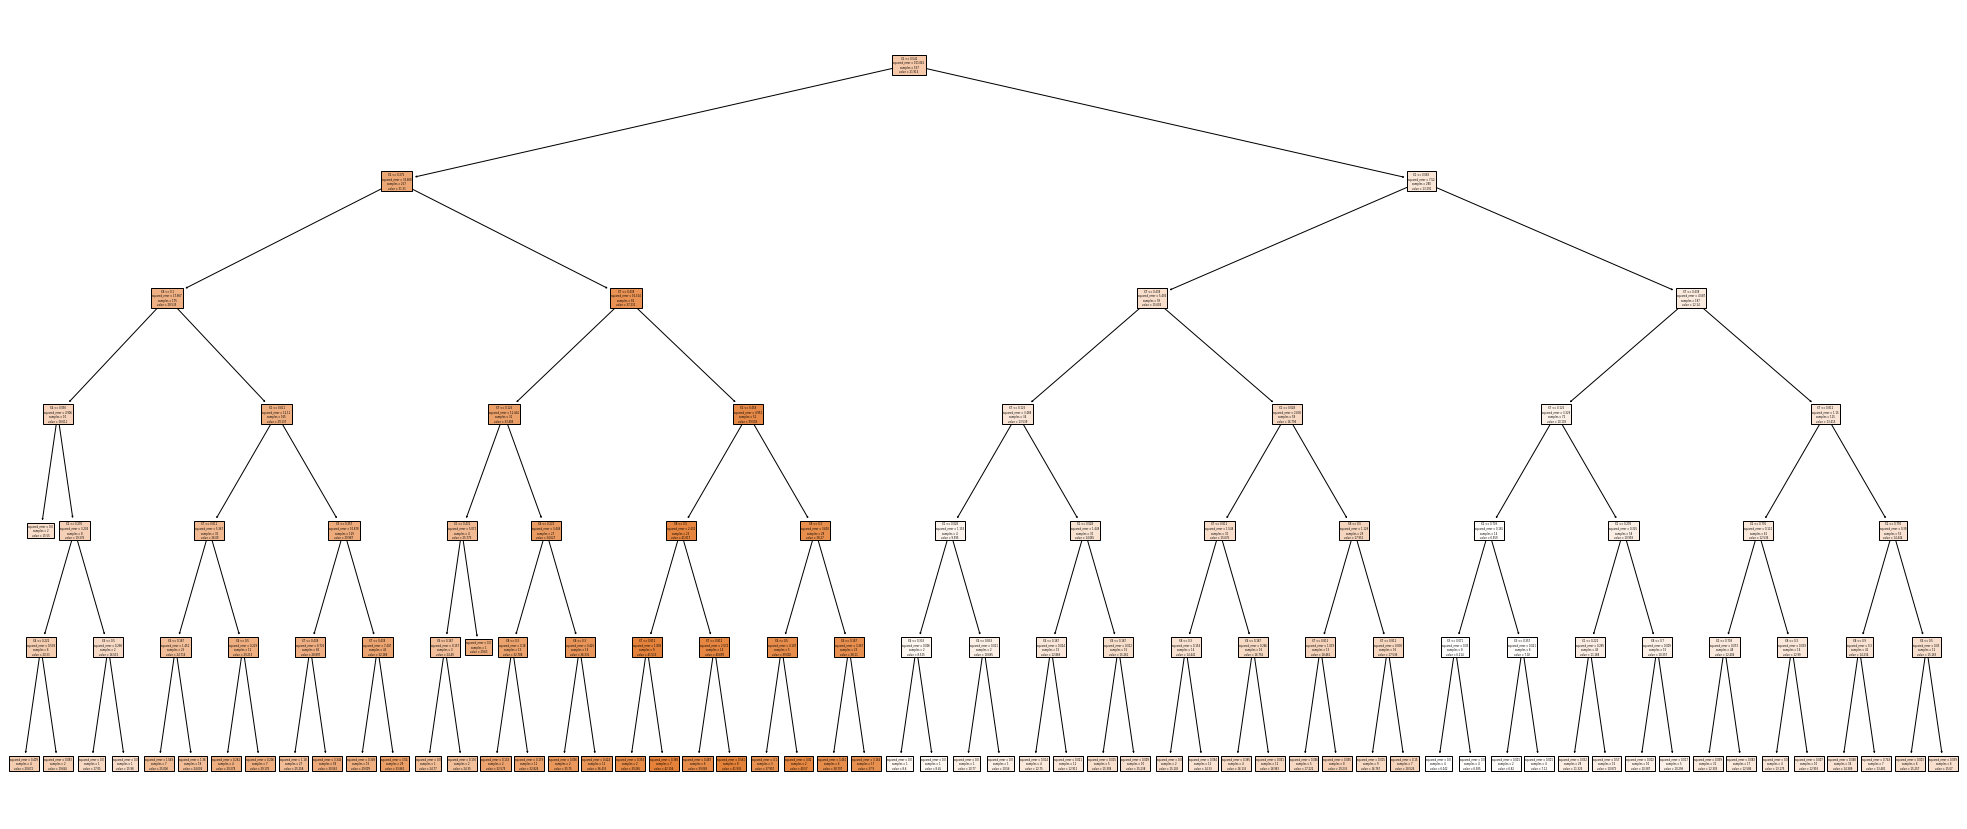

In [42]:
def print_tree(regressor):
  fig = plt.figure(figsize=(35,15))
  tree.plot_tree(regressor,feature_names=df.columns[:-1],filled=True)
regressor=DecisionTreeRegressor(max_depth = 6,max_leaf_nodes = 534,max_features = 6)
regressor.fit(x_train,y_train)
print_tree(regressor)

###  Plotting the mse wrt the different hyper-parameters

In [43]:
def mean_squared_error(y_pred,y_actual):
  return (((y_pred-y_actual)**2).sum())/len(y_actual)

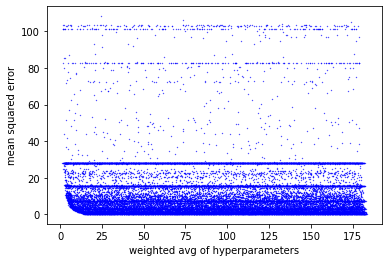

In [44]:
#on x-axis we have (1*(max_depth)+2*(max_leaf_nodes)+3*(max_features))/(6) and on y-axis the mean_squared_error
def print_mse():
  y=[]
  x=[]
  for i in range(len(max_depth)):
    for j in range(len(max_leaf_nodes)):
      for k in range(len(max_features)):
        regressor=DecisionTreeRegressor(max_depth=max_depth[i],max_leaf_nodes=max_leaf_nodes[j],max_features=max_features[k])
        regressor.fit(x_train,y_train)
        x.append((1*(max_depth[i])+2*(max_leaf_nodes[j])+3*(max_features[k]))/(6))
        y_pred=np.array(regressor.predict(x_validate))
        y.append(mean_squared_error(y_pred,y_validate))
  plt.scatter(x,y,color='blue',s=0.1)
  plt.xlabel('weighted avg of hyperparameters')
  plt.ylabel('mean squared error')
  plt.show()
print_mse()

### Making Individual Plots

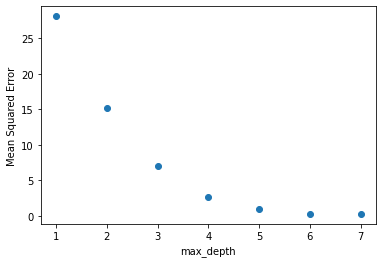

In [45]:
max_depth=(np.arange(1,len(x_train.columns),1)).tolist()
max_leaf_nodes=np.arange(2,len(x_train),1).tolist()
max_features=(np.arange(1,len(x_train.columns),1)).tolist()
def max_depth_plot():
  y=[]
  for i in max_depth:
    regressor=DecisionTreeRegressor(max_depth=i)
    regressor=train_model(x_train,y_train,regressor)
    y_pred=regressor.predict(x_validate)
    y.append(mean_squared_error(y_pred,y_validate))
  plt.scatter(max_depth,y)
  plt.xlabel('max_depth')
  plt.ylabel('Mean Squared Error')
max_depth_plot()

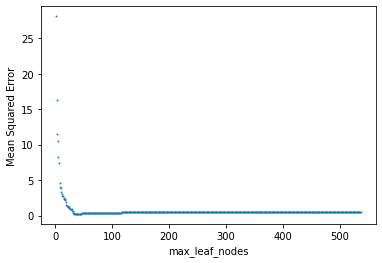

In [46]:
def max_leaf_nodes_plot():
  y=[]
  for i in max_leaf_nodes:
    regressor=DecisionTreeRegressor(max_leaf_nodes=i)
    regressor=train_model(x_train,y_train,regressor)
    y_pred=regressor.predict(x_validate)
    y.append(mean_squared_error(y_pred,y_validate))
  plt.scatter(max_leaf_nodes,y,s=0.8)
  plt.xlabel('max_leaf_nodes')
  plt.ylabel('Mean Squared Error')
max_leaf_nodes_plot()

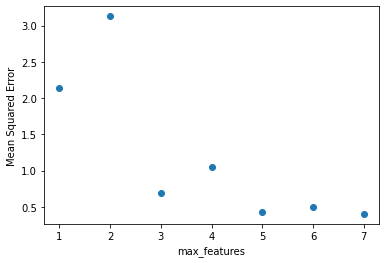

In [47]:
def max_features_plot():
  y=[]
  for i in max_features:
    regressor=DecisionTreeRegressor(max_features=i)
    regressor=train_model(x_train,y_train,regressor)
    y_pred=regressor.predict(x_validate)
    y.append(mean_squared_error(y_pred,y_validate))
  plt.scatter(max_features,y)
  plt.xlabel('max_features')
  plt.ylabel('Mean Squared Error')
max_features_plot()

## 3.Perform Hold-out cross validation, 5-fold cross-validation and repeated-5-fold validation using the optimal hyper-parameters decided in the previous question. Finally, calculate the mean squared error between the predicted and the ground-truth values in the test data for your best model. Also, plot the decision tree created.

### Hold-out cross validation

In [59]:
#splitting in division of 70:30
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1],train_size=0.7,random_state=1)
regressor=DecisionTreeRegressor(max_depth = 6,max_leaf_nodes = 516,max_features = 6)
regressor.fit(x_train,y_train)
print('Score for Hold Out Cross Validation : ',regressor.score(x_test,y_test)*100,'%')

Score for Hold Out Cross Validation :  99.66153649831949 %


### 5-fold cross-validation

In [60]:
from sklearn.model_selection import cross_val_score,KFold
print('5-Fold Cross Validation score : ',cross_val_score(regressor,x_train,y_train,cv=KFold(5,shuffle=True)).mean()*100,'%')

5-Fold Cross Validation score :  99.29637165196897 %


### repeated-5-fold validation

In [61]:
avg=0
for i in range(10):
  avg+=cross_val_score(regressor,x_train,y_train,cv=KFold(5,shuffle=True)).mean()*100
avg/=10
print('Repeated 5-Fold Cross Validation score : ',avg,'%')

Repeated 5-Fold Cross Validation score :  99.08673712682106 %


### mean squared error between the predicted and the ground-truth values in the test data

In [62]:
from sklearn.metrics import mean_squared_error
y_predicted=regressor.predict(x_test)
print('Mean Squared Error : ',mean_squared_error(y_test,y_predicted))

Mean Squared Error :  0.34498131353450945


### Plotting Decision Tree for the best model

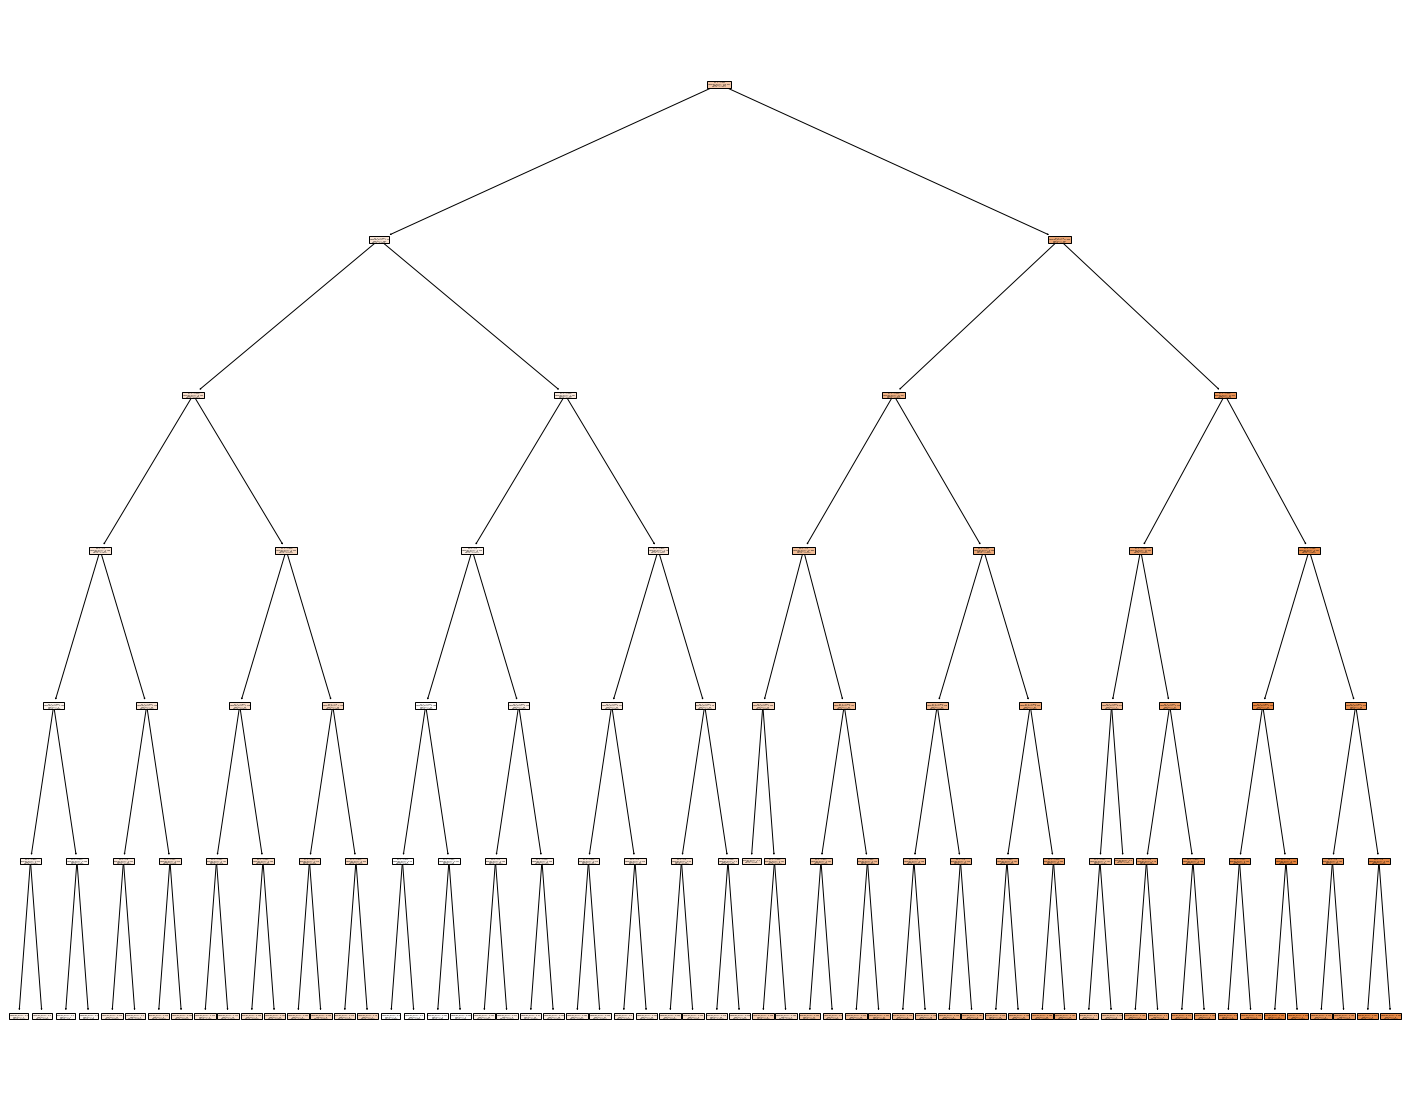

In [64]:
def print_tree(regressor):
  fig = plt.figure(figsize=(25,20))
  tree.plot_tree(regressor,feature_names=df.columns[:-1],filled=True)
regressor=DecisionTreeRegressor(max_depth = 6,max_leaf_nodes = 534,max_features = 6)
regressor.fit(x_train,y_train)
print_tree(regressor)

## 4.Use L1 and L2 as two different criterion for split and plot the decision boundary you obtain.Which loss works better?Explain why one of them performed better on the given dataset. 

#### L1 Criterion

In [65]:
#absolute error is the L1 criterion
regressor=DecisionTreeRegressor(criterion="absolute_error")
regressor.fit(x_train,y_train)
print('L1-Reguralization Score :',regressor.score(x_test,y_test)*100,'%')

L1-Reguralization Score : 99.61045856551195 %


In [66]:
regressor=DecisionTreeRegressor(criterion="absolute_error")
regressor.fit(x_train.iloc[:,:2],y_train)

DecisionTreeRegressor(criterion='absolute_error')

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


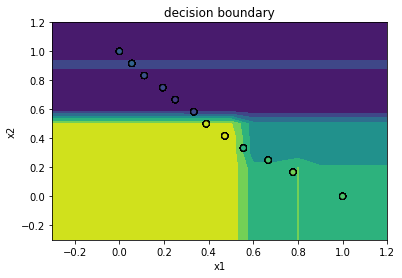

In [67]:
from collections import Counter

def decision_boundary(x,y,clf,title_):
  x_min, x_max = x.iloc[:, 0].min() - 0.3, x.iloc[:, 0].max() + 0.3
  y_min, y_max = x.iloc[:, 1].min() - 0.3, x.iloc[:, 1].max() + 0.3
  xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                np.arange(y_min, y_max, 0.1))

  Z_train = clf.predict(np.c_[xx_train.ravel(), yy_train.ravel()])

  Z_train = Z_train.reshape(xx_train.shape)
  plt.contourf(xx_train, yy_train, Z_train)
  #print(Counter(y))
  plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y, edgecolor = 'k')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(title_)
decision_boundary(x,y,regressor,'decision boundary')

#### L2 Criterion

In [68]:
#squared error is the L1 criterion
regressor=DecisionTreeRegressor(criterion="squared_error")
regressor.fit(x_train,y_train)
print('L2-Reguralization Score :',regressor.score(x_test,y_test)*100,'%')

L2-Reguralization Score : 99.59403585754062 %


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


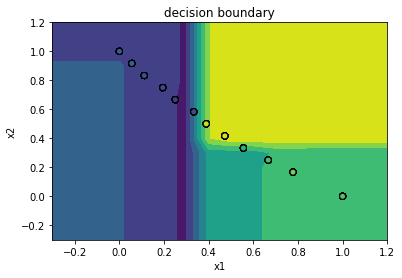

In [69]:
regressor=DecisionTreeRegressor(criterion="squared_error")
regressor.fit(x_train.iloc[:,:2],y_train)
decision_boundary(x,y,regressor,'decision boundary')

**L1 regularization works better here as L2 regularization doesn’t perform feature selection, since weights are only reduced to values near 0 instead of 0. L1 regularization has built-in feature selection. Also, L1 regularization is robust to outliers, L2 regularization is not. L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights.**

# **Question 2**

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [71]:
data=pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## **Classification**

In [72]:
data.drop(['Id','SepalLengthCm','SepalWidthCm'],axis=1,inplace=True)
data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [73]:
data.isnull().sum()

PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [74]:
species=[]
for i in data['Species']:
  if(i=='Iris-setosa'):
    species.append(0)
  elif(i=='Iris-virginica'):
    species.append(2)
  else:
    species.append(1)
data['species']=species
del data['Species']
data

,PetalLengthCm,PetalWidthCm,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [75]:
'''from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1])
data'''

'from sklearn.preprocessing import MinMaxScaler\nscaler=MinMaxScaler()\ndata.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1])\ndata'

In [76]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(x)
print(y)

     PetalLengthCm  PetalWidthCm
0              1.4           0.2
1              1.4           0.2
2              1.3           0.2
3              1.5           0.2
4              1.4           0.2
..             ...           ...
145            5.2           2.3
146            5.0           1.9
147            5.2           2.0
148            5.4           2.3
149            5.1           1.8

[150 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=9)
print(x_train.shape[0])
print(x_test.shape[0])

120
30


###  1.Train a Decision Tree Classifier (max depth=2) on the pre-processed dataset. Plot the decision boundaries of the tree as well as indicate the depth at which each split was made.

[Text(0.4, 0.8333333333333334, 'X[1] <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [37, 41, 42]'), Text(0.2, 0.5, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'), Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 83\nvalue = [0, 41, 42]'), Text(0.4, 0.16666666666666666, 'gini = 0.198\nsamples = 45\nvalue = [0, 40, 5]'), Text(0.8, 0.16666666666666666, 'gini = 0.051\nsamples = 38\nvalue = [0, 1, 37]')]


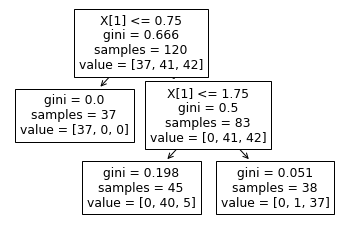

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier=DecisionTreeClassifier(max_depth=2)
classifier=classifier.fit(x_train,y_train)
print(tree.plot_tree(classifier))

In [79]:
y_train_pred=classifier.predict(x_train)
y_test_pred=classifier.predict(x_test)

In [80]:
from sklearn import metrics
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred)*100)
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred)*100)


Training Accuracy of the Model:  95.0
Test Accuracy of the Model:  100.0


In [81]:
from collections import Counter
def decision_boundary(x,y,clf,title_):
  x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
  y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
  xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                np.arange(y_min, y_max, 0.1))

  Z_train = clf.predict(np.c_[xx_train.ravel(), yy_train.ravel()])

  Z_train = Z_train.reshape(xx_train.shape)
  plt.contourf(xx_train, yy_train, Z_train)
  #print(Counter(y))
  plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y, edgecolor = 'k')
  plt.xlabel('PetalLengthCm')
  plt.ylabel('PetalWidthCm')
  plt.title(title_)


None
None


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


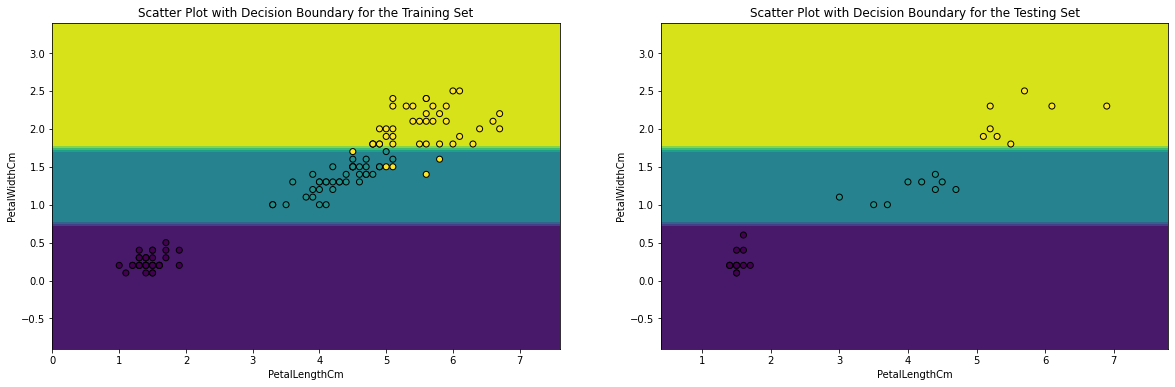

In [82]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
print(decision_boundary(x_train,y_train,classifier,'Scatter Plot with Decision Boundary for the Training Set'))
plt.subplot(1, 2, 2)
print(decision_boundary(x_test,y_test,classifier,'Scatter Plot with Decision Boundary for the Testing Set'))

### 2.Remove the widest Iris-Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree. Plot the Decision boundary for this case

In [83]:
widest_index=int(data[(data['PetalLengthCm']==4.8) & (data['PetalWidthCm']==1.8) & (data['species']==1)].index.to_numpy())
print(widest_index)

70


In [84]:
data.drop(widest_index,inplace=True)
data

,PetalLengthCm,PetalWidthCm,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [85]:
x_new=data.iloc[:,:-1]
y_new=data.iloc[:,-1]
print(x_new)
print(y_new)

     PetalLengthCm  PetalWidthCm
0              1.4           0.2
1              1.4           0.2
2              1.3           0.2
3              1.5           0.2
4              1.4           0.2
..             ...           ...
145            5.2           2.3
146            5.0           1.9
147            5.2           2.0
148            5.4           2.3
149            5.1           1.8

[149 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 149, dtype: int64


In [86]:
from sklearn.model_selection import train_test_split
x_train_n,x_test_n,y_train_n,y_test_n=train_test_split(x_new,y_new,test_size=0.20,random_state=9)
print(x_train.shape[0])
print(x_test.shape[0])

120
30


[Text(0.3333333333333333, 0.9166666666666666, 'X[0] <= 2.6\ngini = 0.665\nsamples = 119\nvalue = [37, 39, 43]'), Text(0.16666666666666666, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'), Text(0.5, 0.75, 'X[1] <= 1.65\ngini = 0.499\nsamples = 82\nvalue = [0, 39, 43]'), Text(0.3333333333333333, 0.5833333333333334, 'X[0] <= 4.95\ngini = 0.169\nsamples = 43\nvalue = [0, 39, 4]'), Text(0.16666666666666666, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'), Text(0.5, 0.4166666666666667, 'X[1] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'), Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(0.6666666666666666, 0.25, 'X[0] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'), Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'), Text(0.8333333333333334, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(0.6666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 39\nvalue = [0, 0,

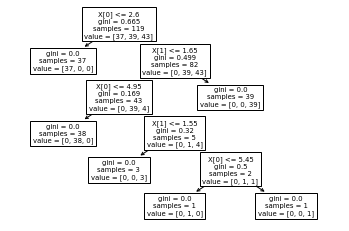

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier=DecisionTreeClassifier()
classifier=classifier.fit(x_train_n,y_train_n)
print(tree.plot_tree(classifier))

In [88]:
y_train_pred_n=classifier.predict(x_train_n)
y_test_pred_n=classifier.predict(x_test_n)

In [89]:
from sklearn import metrics
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train_n, y_train_pred_n)*100)
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test_n, y_test_pred_n)*100)

Training Accuracy of the Model:  100.0
Test Accuracy of the Model:  96.66666666666667


None
None


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


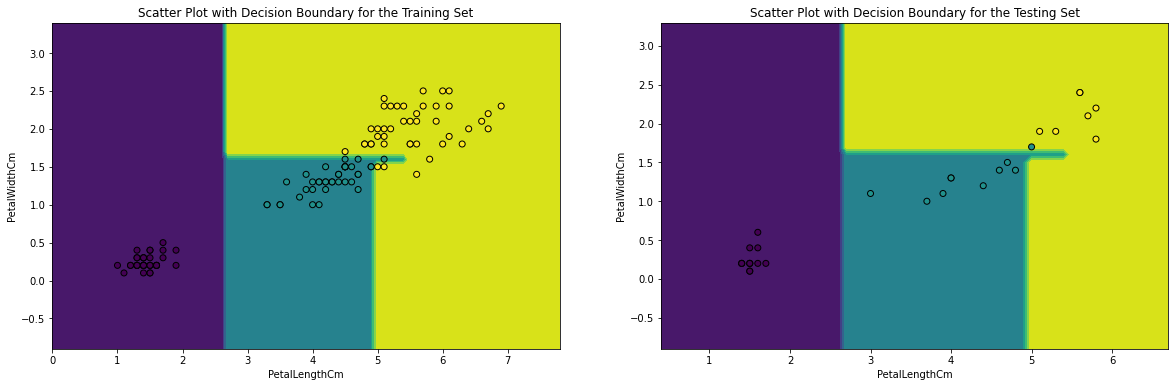

In [90]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
print(decision_boundary(x_train_n,y_train_n,classifier,'Scatter Plot with Decision Boundary for the Training Set'))
plt.subplot(1, 2, 2)
print(decision_boundary(x_test_n,y_test_n,classifier,'Scatter Plot with Decision Boundary for the Testing Set'))

### 3.Train a Decision Tree Classifier with (max-depth = None) on the pre-processed dataset. Plot the Decision boundary for the same. Compare and analyse the results with those in part 1.

[Text(0.5, 0.9166666666666666, 'X[1] <= 0.75\ngini = 0.666\nsamples = 120\nvalue = [37, 41, 42]'), Text(0.4090909090909091, 0.75, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'), Text(0.5909090909090909, 0.75, 'X[1] <= 1.75\ngini = 0.5\nsamples = 83\nvalue = [0, 41, 42]'), Text(0.36363636363636365, 0.5833333333333334, 'X[0] <= 4.95\ngini = 0.198\nsamples = 45\nvalue = [0, 40, 5]'), Text(0.18181818181818182, 0.4166666666666667, 'X[1] <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'), Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'), Text(0.2727272727272727, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(0.5454545454545454, 0.4166666666666667, 'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'), Text(0.45454545454545453, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'), Text(0.6363636363636364, 0.25, 'X[0] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'), Text(0.5454545454545454, 0.08333333333333333, 'gini = 0.0\nsample

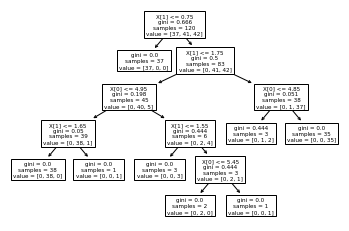

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
classifier_2=DecisionTreeClassifier(max_depth=None)
classifier_2=classifier.fit(x_train,y_train)
print(tree.plot_tree(classifier_2))

In [92]:
y_train_pred=classifier_2.predict(x_train)
y_test_pred=classifier_2.predict(x_test)

In [93]:
from sklearn import metrics
print('Training Accuracy of the Model: ', metrics.accuracy_score(y_train, y_train_pred)*100)
print('Test Accuracy of the Model: ', metrics.accuracy_score(y_test, y_test_pred)*100)

Training Accuracy of the Model:  99.16666666666667
Test Accuracy of the Model:  100.0


None
None


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


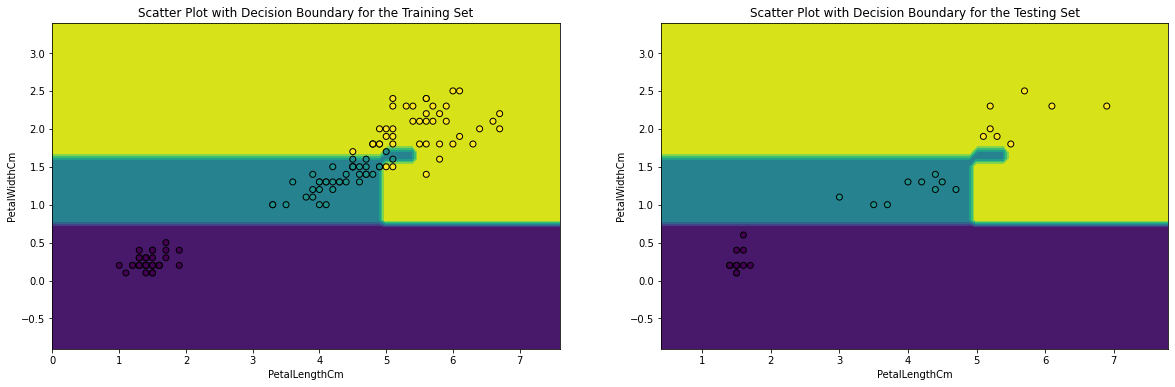

In [94]:
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
print(decision_boundary(x_train,y_train,classifier_2,'Scatter Plot with Decision Boundary for the Training Set'))
plt.subplot(1, 2, 2)
print(decision_boundary(x_test,y_test,classifier_2,'Scatter Plot with Decision Boundary for the Testing Set'))

**By comparing and analyzing the results of this model with that in part1, we can say that in this model when we take max_depth as None then the tree continues to grow unless it overfits the dataset and hence the accuracy for training dataset in this model is close to 100%. The decision boundary obtained for this model is also complex due to its overfitting nature.
So, max_depth hyper-parameter helps to reduce overfitting.**


### 4.Create a random dataset having 2 attributes(X1 and X2), and 2 classes (y=0 and y=1) .X1,X2 are randomly sampled from the range (0,5). y=0 when X1<2.5, and y=1 when X1>2.5. The dataset should have 100 data points for both the classes. Train a decision tree for such a dataset(max-depth=2). Plot the obtained decision boundaries.Now, rotate the datapoints by 45 degrees in clockwise direction about the origin (X1=0,X2=0). Train another decision tree classifier using sklearn. Compare the plots obtained in both the above methods.

In [95]:
import random
X1=[random.uniform(0,5) for _ in range(100)] 
X2=[random.uniform(0,5) for _ in range(100)] 
list_of_tuples = list(zip(X1, X2))
df = pd.DataFrame(list_of_tuples,
                  columns=['X1', 'X2'])
def y(X1):
  Y=[]
  for i in range(100):
    if(X1[i]<2.5):
      Y.append(0)
    else:
      Y.append(1)
  return Y
df['Y']=y(X1)
df      

,X1,X2,Y
0,1.134336,1.944856,0
1,1.825654,0.379015,0
2,3.855164,3.341199,1
3,2.423228,1.977140,0
4,1.467863,1.410649,0
...,...,...,...
95,0.591685,0.374078,0
96,2.147969,0.351936,0
97,2.804123,0.064998,1
98,4.715132,4.761314,1


[Text(0.5, 0.75, 'X[0] <= 2.527\ngini = 0.493\nsamples = 100\nvalue = [44, 56]'), Text(0.25, 0.25, 'gini = 0.0\nsamples = 44\nvalue = [44, 0]'), Text(0.75, 0.25, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]')]


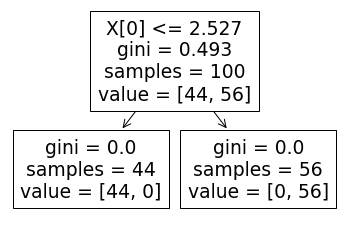

In [96]:
clf=DecisionTreeClassifier(max_depth=2)
clf=clf.fit(df.iloc[:,:2],df.iloc[:,2])
print(tree.plot_tree(clf))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


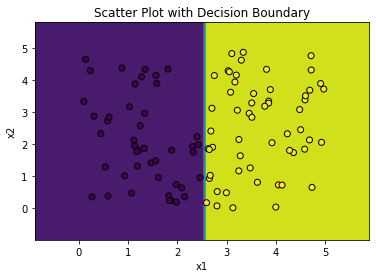

In [97]:
from collections import Counter
def decision_boundary(x,y,clf):
  x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
  y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
  xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                np.arange(y_min, y_max, 0.1))

  Z_train = clf.predict(np.c_[xx_train.ravel(), yy_train.ravel()])

  Z_train = Z_train.reshape(xx_train.shape)
  plt.contourf(xx_train, yy_train, Z_train)
  #print(Counter(y))
  plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y, edgecolor = 'k')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title('Scatter Plot with Decision Boundary')
decision_boundary(df,df.iloc[:,2],clf)

In [98]:
print(df)

          X1        X2  Y
0   1.134336  1.944856  0
1   1.825654  0.379015  0
2   3.855164  3.341199  1
3   2.423228  1.977140  0
4   1.467863  1.410649  0
..       ...       ... ..
95  0.591685  0.374078  0
96  2.147969  0.351936  0
97  2.804123  0.064998  1
98  4.715132  4.761314  1
99  1.564609  4.144321  0

[100 rows x 3 columns]


In [99]:
import math
def rotate(x,y):
  x_n=(x+y)/math.sqrt(2)
  y_n=(y-x)/math.sqrt(2)
  return x_n,y_n
for i in range(len(df)):
  df.iloc[i,0],df.iloc[i,1]=rotate(df.iloc[i,0],df.iloc[i,1])
print(df)


          X1        X2  Y
0   2.177317  0.573124  0
1   1.558936 -1.022928  0
2   5.088597 -0.363428  1
3   3.111530 -0.315432  0
4   2.035415 -0.040457  0
..       ...       ... ..
95  0.682898 -0.153872  0
96  1.767700 -1.269987  0
97  2.028775 -1.936854  1
98  6.700859  0.032655  1
99  4.036823  1.824132  0

[100 rows x 3 columns]


[Text(0.5909090909090909, 0.9, 'X[0] <= 4.076\ngini = 0.493\nsamples = 100\nvalue = [44, 56]'), Text(0.36363636363636365, 0.7, 'X[1] <= -1.161\ngini = 0.433\nsamples = 63\nvalue = [43, 20]'), Text(0.18181818181818182, 0.5, 'X[0] <= 1.859\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'), Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'), Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'), Text(0.5454545454545454, 0.5, 'X[0] <= 3.138\ngini = 0.194\nsamples = 46\nvalue = [41, 5]'), Text(0.45454545454545453, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [32, 0]'), Text(0.6363636363636364, 0.3, 'X[1] <= -0.157\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'), Text(0.5454545454545454, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'), Text(0.7272727272727273, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'), Text(0.8181818181818182, 0.7, 'X[1] <= 1.505\ngini = 0.053\nsamples = 37\nvalue = [1, 36]'), Text(0.7272727272727273, 0.5, 'gini = 0.0\nsamples = 36\nva

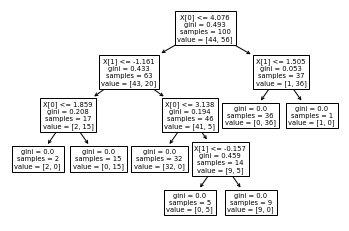

In [100]:
clf_2=DecisionTreeClassifier()
clf_2=clf_2.fit(df.iloc[:,:2],df.iloc[:,2])
print(tree.plot_tree(clf_2))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


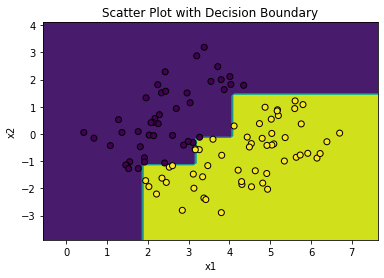

In [101]:
decision_boundary(df,df.iloc[:,2],clf_2)

**We observe that as we rotate the data points, the decision boundary obtained also changes accordingly. Now it has become more complex.**

### 5.Put forward your observations about the behaviour of Decision Tree Classifier as seen in tasks 2,3 and 4.

**It is evident from part 2,3,4 that even slight modifications to the data and hyper-parameters can cause significant changes to the decision tree, indicating that the algorithm is extremely responsive to changes in the data and tends to overfit by attempting to fit every point in the training data.**

## **Regression**

In [109]:
df=pd.read_csv('/content/task.csv')
df

,X,Y
0,0.374540,-0.005042
1,0.950714,0.835799
2,0.731994,0.244592
3,0.598658,-0.032501
4,0.156019,0.659870
...,...,...
195,0.349210,-0.049795
196,0.725956,0.132379
197,0.897110,0.609442
198,0.887086,0.630434


In [110]:
df.isnull().sum()

X    0
Y    0
dtype: int64

In [111]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x)
print(y)

            X
0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
..        ...
195  0.349210
196  0.725956
197  0.897110
198  0.887086
199  0.779876

[200 rows x 1 columns]
0     -0.005042
1      0.835799
2      0.244592
3     -0.032501
4      0.659870
         ...   
195   -0.049795
196    0.132379
197    0.609442
198    0.630434
199    0.460857
Name: Y, Length: 200, dtype: float64


In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
print(x_train.shape[0])
print(x_test.shape[0])

140
60


### 1.Train two decision tree models, one with max_depth = 2 and another with max_depth = 3. Plot the regression predictions at each depth for each max_depth( for e.g., at depths 0,1 for max_depth = 2) using a line plot. Next, make a scatter plot of the data points on the same plots to give a detailed analysis of what you see in the report along with the plots.

#### max_depth=2

In [133]:
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
from sklearn.tree import DecisionTreeRegressor
regressor_1 = DecisionTreeRegressor(max_depth=2)
regressor_1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

In [134]:
y_predicted=regressor_1.predict(x)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [135]:
print("score for testing dataset is: ",regressor_1.score(x_test,y_test))

score for testing dataset is:  0.6705941721956636


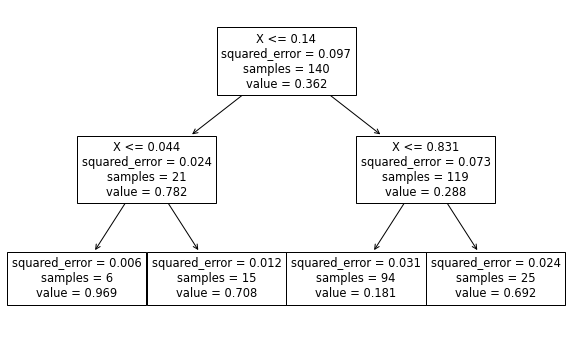

In [136]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,6)) 
plot_tree(regressor_1, feature_names='X');

In [137]:
x

,X
0,0.374540
1,0.950714
2,0.731994
3,0.598658
4,0.156019
...,...
195,0.349210
196,0.725956
197,0.897110
198,0.887086


In [138]:
min1, max1 = x.iloc[:, 0].min()-0.1, x.iloc[:, 0].max()+0.1

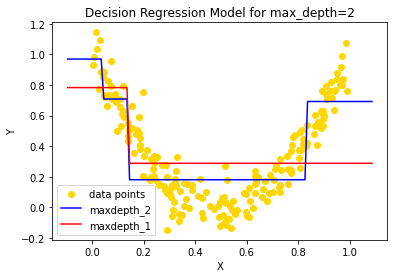

In [139]:
X_grid = np.arange(min1, max1, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'gold',label='data points')
plt.plot(X_grid, regressor_1.predict(X_grid), color = 'blue',label='maxdepth_2')
reg_0= DecisionTreeRegressor(max_depth=1)
reg_0.fit(x_train,y_train)
plt.plot(X_grid, reg_0.predict(X_grid), color = 'red',label='maxdepth_1')
plt.title('Decision Regression Model for max_depth=2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

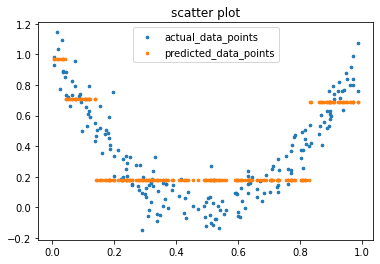

In [140]:
#scatter plots for actual vs predicted y
plt.scatter(x,y,s=7,label='actual_data_points')
plt.scatter(x,y_predicted,s=7,label='predicted_data_points')
plt.title('scatter plot')
plt.legend()
plt.show()

#### max_depth=3

In [147]:
from sklearn.tree import DecisionTreeRegressor
regressor_2 = DecisionTreeRegressor(max_depth=3)
regressor_2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [148]:
y_predicted=regressor_2.predict(x)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [149]:
print("score for testing dataset is: ",regressor_2.score(x_test,y_test))

score for testing dataset is:  0.7817404266944593


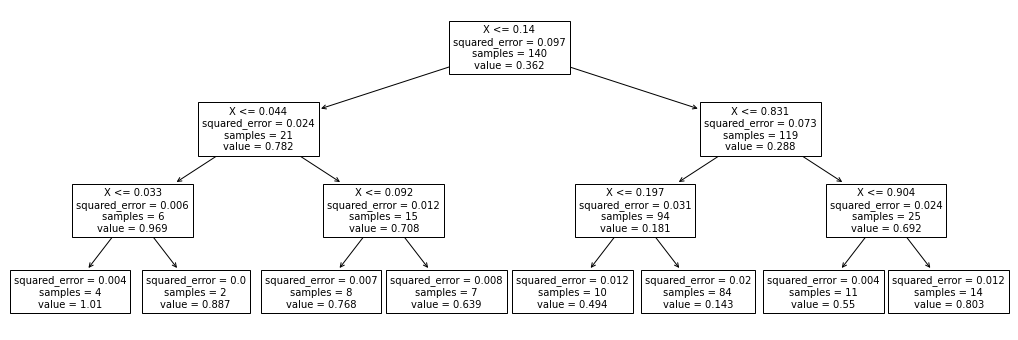

In [150]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,6)) 
plot_tree(regressor_2, feature_names='X', fontsize=10);

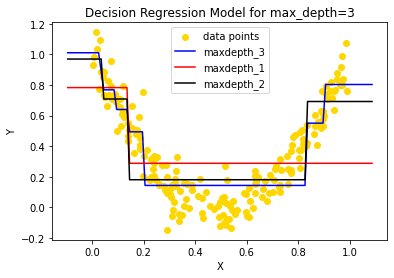

In [151]:
X_grid = np.arange(min1, max1, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'gold',label='data points')
plt.plot(X_grid, regressor_2.predict(X_grid), color = 'blue',label='maxdepth_3')
reg_0= DecisionTreeRegressor(max_depth=1)
reg_0.fit(x_train,y_train)
plt.plot(X_grid, reg_0.predict(X_grid), color = 'red',label='maxdepth_1')
reg_1= DecisionTreeRegressor(max_depth=2)
reg_1.fit(x_train,y_train)
plt.plot(X_grid, reg_1.predict(X_grid), color = 'black',label='maxdepth_2')
plt.title('Decision Regression Model for max_depth=3')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

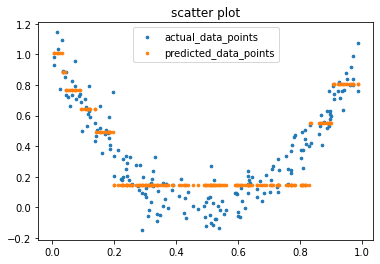

In [152]:
#scatter plots for actual vs predicted y
plt.scatter(x,y,s=7,label='actual_data_points')
plt.scatter(x,y_predicted,s=7,label='predicted_data_points')
plt.title('scatter plot')
plt.legend()
plt.show()

**The testing score for max_depth=2 model is less than that of max_depth=3. It is apparent that by increasing the max_depth of our model by 1, there was a noticeable improvement in its performance in the testing data, as also evidenced by the scatter plot. Also, from the line plot we can see that the on increasing max_depth the line plot fits are data more nicely.**

### 2.Plot the data points and make a line graph to show the decision tree fits on the dataset in two cases: min_samples_leaf = 0 and min_samples_leaf = 10. Analyze the two plots and explain your findings in the report.

#### min_samples_leaf = 0 

In [153]:
from sklearn.tree import DecisionTreeRegressor
regressor_3 = DecisionTreeRegressor()
regressor_3.fit(x_train,y_train)

DecisionTreeRegressor()

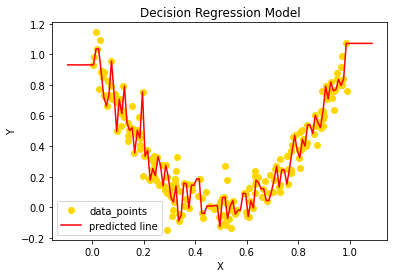

In [154]:
X_grid = np.arange(min1, max1, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'gold',label='data_points')
plt.plot(X_grid, regressor_3.predict(X_grid), color = 'red',label='predicted line')
plt.title('Decision Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [155]:
print('Training score of the Model: ', regressor_3.score(x_train,y_train)*100)
print('Test score of the Model: ', regressor_3.score(x_test,y_test)*100)

Training score of the Model:  100.0
Test score of the Model:  82.4421438837492


#### min_samples_leaf = 10 

In [156]:
from sklearn.tree import DecisionTreeRegressor
regressor_4 = DecisionTreeRegressor(min_samples_leaf = 10)
regressor_4.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_leaf=10)

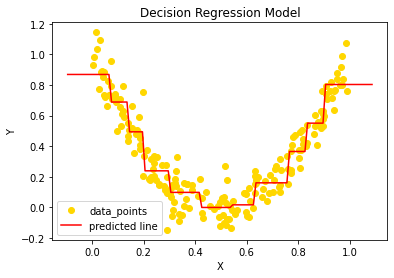

In [157]:
X_grid = np.arange(min1, max1, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x, y, color = 'gold',label='data_points')
plt.plot(X_grid, regressor_4.predict(X_grid), color = 'red',label='predicted line')
plt.title('Decision Regression Model')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [158]:
print('Training score of the Model: ', regressor_4.score(x_train,y_train)*100)
print('Test score of the Model: ', regressor_4.score(x_test,y_test)*100)

Training score of the Model:  91.19756982111366
Test score of the Model:  85.84721647979443


#**Question 3**

## 1.Perform pre-processing and visualization of the dataset. Perform categorical encoding wherever applicable and split the data into train and test sets

In [159]:
pip install palmerpenguins

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [160]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from palmerpenguins import load_penguins

In [161]:
dataset=load_penguins()
dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


###pre-processing

#### Missing values

In [162]:
print(dataset.isna().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [163]:
print(dataset.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object


In [164]:
dataset.bill_length_mm.fillna(dataset.bill_length_mm.mean(),inplace=True)
dataset.bill_depth_mm.fillna(dataset.bill_depth_mm.mean(),inplace=True)
dataset.flipper_length_mm.fillna(dataset.flipper_length_mm.mean(),inplace=True)
dataset.body_mass_g.fillna(dataset.body_mass_g.mean(),inplace=True)

In [165]:
print(dataset.isna().sum())

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
year                  0
dtype: int64


In [166]:
from collections import Counter
sex_count=Counter(dataset['sex'])
print(sex_count)

Counter({'male': 168, 'female': 165, nan: 11})


In [167]:
#as the number of males are more than females, we replace nan with males
dataset.sex.fillna('male',inplace=True)
print(dataset.isna().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


####visualizing the dataset

Text(0.5, 0.98, 'Count')

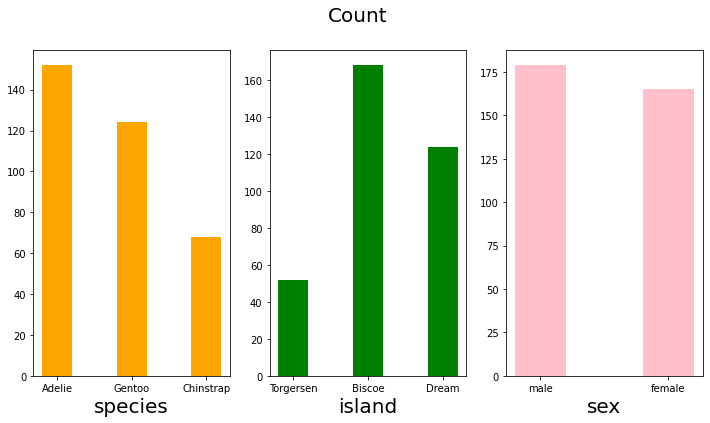

In [168]:
figure, axes = plt.subplots(1, 3, figsize=(12,6))
from collections import Counter
species_d=Counter(dataset['species'])
island_d=Counter(dataset['island'])
sex_d=Counter(dataset['sex'])
count1 = list(species_d.values())
count2 = list(island_d.values())
count3=list(sex_d.values())
specie = list(['Adelie','Gentoo','Chinstrap'])
island = list(['Torgersen','Biscoe','Dream'])
sex = list(['male','female'])
axes[0].bar(specie, count1, color ='orange',
        width = 0.4)
axes[0].set_xlabel('species',fontsize=20)
axes[1].bar(island, count2, color ='green',
        width = 0.4)
axes[1].set_xlabel('island',fontsize=20)
axes[2].bar(sex, count3, color ='pink',
        width = 0.4)
axes[2].set_xlabel('sex',fontsize=20)
figure.suptitle('Count',fontsize=20)

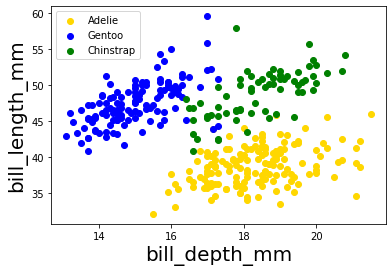

In [169]:

class_0=dataset[dataset['species']=='Adelie']
class_1=dataset[dataset['species']=='Gentoo']
class_2=dataset[dataset['species']=='Chinstrap']
plt.scatter(class_0['bill_depth_mm'],class_0['bill_length_mm'],c='gold')
plt.scatter(class_1['bill_depth_mm'],class_1['bill_length_mm'],c='blue')
plt.scatter(class_2['bill_depth_mm'],class_2['bill_length_mm'],c='green')
plt.legend(['Adelie','Gentoo','Chinstrap'])
plt.xlabel("bill_depth_mm",fontsize=20)
plt.ylabel("bill_length_mm",fontsize=20)
plt.show()

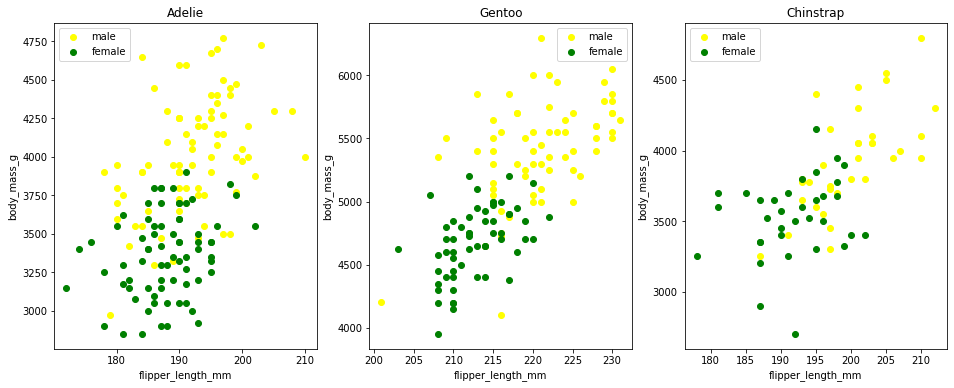

In [170]:
figure, axes = plt.subplots(1, 3, figsize=(16,6))
class_0_m=class_0[class_0['sex']=='male']
class_0_f=class_0[class_0['sex']=='female']
axes[0].scatter(class_0_m['flipper_length_mm'],class_0_m['body_mass_g'],c='yellow')
axes[0].scatter(class_0_f['flipper_length_mm'],class_0_f['body_mass_g'],c='green')
axes[0].set_title("Adelie")
axes[0].legend(['male','female'])
class_1_m=class_1[class_1['sex']=='male']
class_1_f=class_1[class_1['sex']=='female']
axes[1].scatter(class_1_m['flipper_length_mm'],class_1_m['body_mass_g'],c='yellow')
axes[1].scatter(class_1_f['flipper_length_mm'],class_1_f['body_mass_g'],c='green')
axes[1].set_title("Gentoo")
axes[1].legend(['male','female'])
class_2_m=class_2[class_2['sex']=='male']
class_2_f=class_2[class_2['sex']=='female']
axes[2].scatter(class_2_m['flipper_length_mm'],class_2_m['body_mass_g'],c='yellow')
axes[2].scatter(class_2_f['flipper_length_mm'],class_2_f['body_mass_g'],c='green')
axes[2].set_title("Chinstrap")
axes[2].legend(['male','female'])
axes[0].set_xlabel("flipper_length_mm")
axes[1].set_xlabel("flipper_length_mm")
axes[2].set_xlabel("flipper_length_mm")
axes[0].set_ylabel("body_mass_g")
axes[1].set_ylabel("body_mass_g")
axes[2].set_ylabel("body_mass_g")
plt.show()

Text(0.5, 1.0, 'body_mass_g')

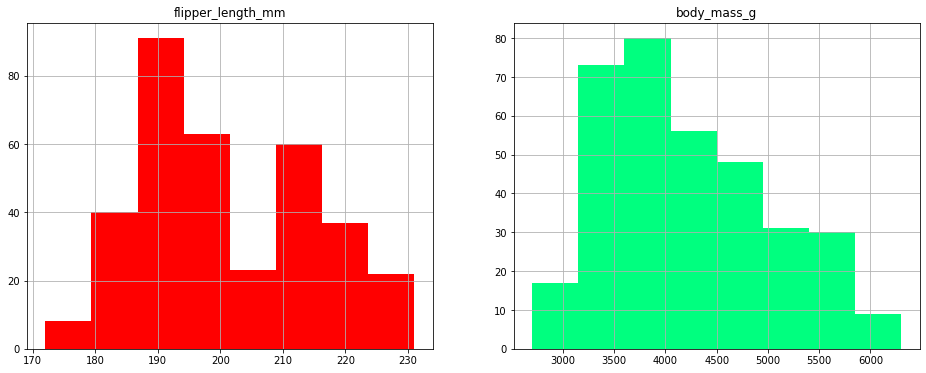

In [171]:
figure, axes = plt.subplots(1, 2, figsize=(16,6))
dataset['flipper_length_mm'].hist(bins=8,ax=axes[0],color='red')
dataset['body_mass_g'].hist(bins=8,ax=axes[1],color='springgreen')
axes[0].set_title('flipper_length_mm')
axes[1].set_title('body_mass_g')

#### encoding categorical data

In [172]:
#encoding the categorical features
categorical_features=['species','island','sex','year']
for i in categorical_features:
  print(Counter(dataset[i]))

Counter({'Adelie': 152, 'Gentoo': 124, 'Chinstrap': 68})
Counter({'Biscoe': 168, 'Dream': 124, 'Torgersen': 52})
Counter({'male': 179, 'female': 165})
Counter({2009: 120, 2008: 114, 2007: 110})


In [173]:
s=dataset['island']
Island_Biscoe=[]
Island_Dream=[]
Island_Torgersen=[]
for i in range(len(dataset)):
  if(s[i]=='Biscoe'):
      Island_Biscoe.append(1)
      Island_Dream.append(0)
      Island_Torgersen.append(0)
  elif(s[i]=='Dream'):
      Island_Biscoe.append(0)
      Island_Dream.append(1)
      Island_Torgersen.append(0)
  else:
      Island_Biscoe.append(0)
      Island_Dream.append(0)
      Island_Torgersen.append(1)
dataset['Island_Biscoe']=Island_Biscoe
dataset['Island_Dream']=Island_Dream 
dataset['Island_Torgersen']=Island_Torgersen 
del dataset['island']

In [174]:
s=dataset['year']
Year_2009=[]
Year_2008=[]
Year_2007=[]
for i in range(len(dataset)):
  if(s[i]==2009):
      Year_2009.append(1)
      Year_2008.append(0)
      Year_2007.append(0)
  elif(s[i]==2008):
      Year_2009.append(0)
      Year_2008.append(1)
      Year_2007.append(0)
  else:
      Year_2009.append(0)
      Year_2008.append(0)
      Year_2007.append(1)
dataset['Year_2009']=Year_2009
dataset['Year_2008']=Year_2008
dataset['Year_2007']=Year_2007 
del dataset['year']

In [175]:
s=dataset['sex']
Sex=[]
for i in range(len(dataset)):
  if(s[i]=='male'):
      Sex.append(0)
  else:
      Sex.append(1)
dataset['Sex']=Sex   
del dataset['sex']

In [176]:
s=dataset['species']
Species=[]
for i in range(len(dataset)):
  if(s[i]=='Adelie'):
      Species.append(0)
  elif(s[i]=='Gentoo'):
      Species.append(1)
  else:
      Species.append(2)
dataset['Species']=Species   
del dataset['species']

In [177]:
dataset

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_Biscoe,Island_Dream,Island_Torgersen,Year_2009,Year_2008,Year_2007,Sex,Species
0,39.10000,18.70000,181.000000,3750.000000,0,0,1,0,0,1,0,0
1,39.50000,17.40000,186.000000,3800.000000,0,0,1,0,0,1,1,0
2,40.30000,18.00000,195.000000,3250.000000,0,0,1,0,0,1,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,1,0,0,1,0,0
4,36.70000,19.30000,193.000000,3450.000000,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.80000,19.80000,207.000000,4000.000000,0,1,0,1,0,0,0,2
340,43.50000,18.10000,202.000000,3400.000000,0,1,0,1,0,0,1,2
341,49.60000,18.20000,193.000000,3775.000000,0,1,0,1,0,0,0,2
342,50.80000,19.00000,210.000000,4100.000000,0,1,0,1,0,0,0,2


####scaling

In [178]:
dataset.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_Biscoe,Island_Dream,Island_Torgersen,Year_2009,Year_2008,Year_2007,Sex,Species
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.488372,0.360465,0.151163,0.348837,0.331395,0.319767,0.479651,0.755814
std,5.443643,1.969027,14.020657,799.613058,0.500593,0.480835,0.358729,0.477297,0.471401,0.467066,0.500313,0.762626
min,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.275000,15.600000,190.000000,3550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.250000,17.300000,197.000000,4050.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset.iloc[:,:4]=scaler.fit_transform(dataset.iloc[:,:4])

In [180]:
dataset

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_Biscoe,Island_Dream,Island_Torgersen,Year_2009,Year_2008,Year_2007,Sex,Species
0,0.254545,0.666667,0.152542,0.291667,0,0,1,0,0,1,0,0
1,0.269091,0.511905,0.237288,0.305556,0,0,1,0,0,1,1,0
2,0.298182,0.583333,0.389831,0.152778,0,0,1,0,0,1,1,0
3,0.429888,0.482282,0.490088,0.417154,0,0,1,0,0,1,0,0
4,0.167273,0.738095,0.355932,0.208333,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.861818,0.797619,0.593220,0.361111,0,1,0,1,0,0,0,2
340,0.414545,0.595238,0.508475,0.194444,0,1,0,1,0,0,1,2
341,0.636364,0.607143,0.355932,0.298611,0,1,0,1,0,0,0,2
342,0.680000,0.702381,0.644068,0.388889,0,1,0,1,0,0,0,2


#### splitting the data

In [181]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
print(x)
print(y)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0          0.254545       0.666667           0.152542     0.291667   
1          0.269091       0.511905           0.237288     0.305556   
2          0.298182       0.583333           0.389831     0.152778   
3          0.429888       0.482282           0.490088     0.417154   
4          0.167273       0.738095           0.355932     0.208333   
..              ...            ...                ...          ...   
339        0.861818       0.797619           0.593220     0.361111   
340        0.414545       0.595238           0.508475     0.194444   
341        0.636364       0.607143           0.355932     0.298611   
342        0.680000       0.702381           0.644068     0.388889   
343        0.658182       0.666667           0.440678     0.298611   

     Island_Biscoe  Island_Dream  Island_Torgersen  Year_2009  Year_2008  \
0                0             0                 1          0          0   
1      

In [182]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
print(x_train.shape[0])
print(x_test.shape[0])

240
104


In [183]:
Counter(y_train)

Counter({2: 48, 0: 105, 1: 87})

## 2.Implement the cost function as per your roll num.

In [184]:
def giniIndex(y):
  y=list(y)
  y_set=list(set(y))
  l=[]
  for i in range(len(y_set)):
    l.append(y.count(y_set[i]))
  probability=[]
  for i in range(len(l)):
    probability.append(l[i]/sum(l))
  #print(y_set,l,probability)
  p=0
  for i in probability:
    p+=(i**2)
  gini=1-p
  return gini
giniIndex(y_train)

0.6371875

## 3.In order for the decision tree to work successfully, continuous variables need to be converted to categorical variables first. To do this, you need to implement a decision function that makes this split. Let us call that cont_to_cat().

In [185]:
def  cont_to_cat(data,cont_feature,y_feature):
  least_weight=500
  cont_feature_split_index=-1
  n=len(data)
  for i in range(n):
    data_above=data[data[cont_feature]<=(data[cont_feature][i])]
    data_below=data[data[cont_feature]>(data[cont_feature][i])]
    data_above_class0=data_above[data_above[y_feature]==0]
    data_above_class1=data_above[data_above[y_feature]==1]
    data_above_class2=data_above[data_above[y_feature]==2]
    data_below_class0=data_below[data_below[y_feature]==0]
    data_below_class1=data_below[data_below[y_feature]==1]
    data_below_class2=data_below[data_below[y_feature]==2]
    if(len(data_above)!=0 and len(data_below)!=0):
      p_above=[len(data_above_class0)/len(data_above),len(data_above_class1)/len(data_above),len(data_above_class2)/len(data_above)]
      p_below=[len(data_below_class0)/len(data_below),len(data_below_class1)/len(data_below),len(data_below_class2)/len(data_below)]
      gini_index_above_s=0
      gini_index_below_s=0
      for j in range(3):
        gini_index_above_s+=p_above[j]**2
        gini_index_below_s+=p_below[j]**2
      gini_index_above=1-gini_index_above_s
      gini_index_below=1-gini_index_below_s
      weighted=(gini_index_above*(len(data_above)/len(data)))+(gini_index_below*(len(data_below)/len(data)))
      if(weighted<least_weight):
        least_weight=weighted
        cont_feature_split_index=i
  l=[]
  for i in range(n):
    if(data[cont_feature][i]<=data[cont_feature][cont_feature_split_index]):
      l.append(0)
    else:
      l.append(1)
  return l


In [186]:
(dataset['bill_length_mm'])=cont_to_cat(dataset,'bill_length_mm','Species')
(dataset['bill_depth_mm'])=cont_to_cat(dataset,'bill_depth_mm','Species')
(dataset['flipper_length_mm'])=cont_to_cat(dataset,'flipper_length_mm','Species')
(dataset['body_mass_g'])=cont_to_cat(dataset,'body_mass_g','Species')
dataset

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_Biscoe,Island_Dream,Island_Torgersen,Year_2009,Year_2008,Year_2007,Sex,Species
0,0,1,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,1,0,0,1,1,0
2,0,1,0,0,0,0,1,0,0,1,1,0
3,1,1,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,1,1,1,0,0,1,0,1,0,0,0,2
340,1,1,0,0,0,1,0,1,0,0,1,2
341,1,1,0,0,0,1,0,1,0,0,0,2
342,1,1,1,0,0,1,0,1,0,0,0,2


In [187]:
#encoding the categorical features
categorical_features=['bill_length_mm','bill_depth_mm','body_mass_g','flipper_length_mm']
for i in categorical_features:
  print(Counter(dataset[i]))

Counter({1: 201, 0: 143})
Counter({1: 222, 0: 122})
Counter({0: 229, 1: 115})
Counter({0: 215, 1: 129})


In [188]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
print(x)
print(y)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0                 0              1                  0            0   
1                 0              1                  0            0   
2                 0              1                  0            0   
3                 1              1                  0            0   
4                 0              1                  0            0   
..              ...            ...                ...          ...   
339               1              1                  1            0   
340               1              1                  0            0   
341               1              1                  0            0   
342               1              1                  1            0   
343               1              1                  0            0   

     Island_Biscoe  Island_Dream  Island_Torgersen  Year_2009  Year_2008  \
0                0             0                 1          0          0   
1      

In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
print(x_train.shape[0])
print(x_test.shape[0])

240
104


## 4.After step 2, all the attributes would have categorical values, so now you can go ahead and implement the training function. This would include implementing the following helper functions:
* a. Get the attribute that leads to the best split
* b. Make that split
* c. Repeat these steps for the newly-created split






In [190]:
def split(df,col):
    df0=df[df[col]==0]
    df1=df[df[col]==1]
    gini_0=giniIndex(df0['Species'])
    gini_1=giniIndex(df1['Species'])
    gini=((len(df0)/len(df))*gini_0)+((len(df1)/len(df))*gini_1)
    return gini,df0,df1
def attribute(df):
    col=df.columns.values.tolist()
    col=col[:-1]
    #print(col)
    gini_min=100
    df_0=None
    df_1=None
    col_name=None
    for i in col:
      g,df0,df1=split(df,i)
      if(g<gini_min):
        gini_min=g
        df_0=df0
        df_1=df1
        col_name=i

    return col_name,df_0,df_1

## 5.The DT should also include the following properties in the train function

*   a. There should be a max depth that should be defined i.e. a depth after which the tree
shouldn’t be allowed to grow 
*   b. The algorithm should self-identify when there is no information gain being done, i.e. the
model has plateaued in it’s training and shouldn’t grow further




In [210]:
class Node:
  def __init__(self,data,df0,df1):
        self.data=data
        self.df0=df0
        self.df1=df1
        self.left=None
        self.right=None

In [214]:
from collections import Counter
def decision_tree(df,max_depth):
  return tree(df,df.shape[1]-2,max_depth)


def tree(df,k,depth):
    c,df_0,df_1=attribute(df)
    
    root=Node(c,df_0,df_1)
    df0_set=list(set(list(root.df0['Species'])))
    df1_set=list(set(list(root.df1['Species'])))
    #print(df0_set)
    #print(df1_set)
    if(depth==1):
      count=Counter(root.df0['Species'])
      keys=list(count.keys())
      values=(list(count.values()))
      max_val=np.max(values)
      Keymax=keys[values.index(max_val)]
      root.left=Node(Keymax,None,None)
    else:
      if(len(df0_set)<=1):
        if(len(df0_set)==0):
           root.left=None
        else:
           root.left=Node(df0_set[0],None,None)
      else:
        if(k!=0):
           root.left=tree(root.df0,k-1,depth-1)
        else:
           count=Counter(root.df0['Species'])
           keys=list(count.keys())
           values=(list(count.values()))
           max_val=np.max(values)
           Keymax=keys[values.index(max_val)]
           root.left=Node(Keymax,None,None)
    
    if(depth==1):
      count=Counter(root.df1['Species'])
      keys=list(count.keys())
      values=(list(count.values()))
      max_val=np.max(values)
      Keymax=keys[values.index(max_val)]
      root.right=Node(Keymax,None,None)
    else:
      if(len(df1_set)<=1):
         if(len(df1_set)==0):
              root.right=None
         else:
              root.right=Node(df1_set[0],None,None)
      else:
         if(k!=0):
             root.right=tree(root.df1,k-1,depth-1)
         else:
             count=Counter(root.df1['Species'])
             keys=list(count.keys())
             values=(list(count.values()))
             max_val=np.max(values)
             Keymax=keys[values.index(max_val)]
             root.right=Node(Keymax,None,None)
    return root

In [215]:
def traverse(r):
        tree = {'root':str(r.data)}
        stack = [r]
        node = r
        while len(stack) > 0:
            while node is not None:
                stack.append(node)
                node = node.left            
            node = stack.pop(-1)
            if(node.left!=None):
              tree[str(node.data)] = {'left':node.left.data,'right':node.right.data}
            
            node = node.right
        return tree

In [216]:
training=x_train
training['Species']=list(y_train)
dec_tree=decision_tree(training,20)

In [217]:
traverse(dec_tree)

{'root': 'flipper_length_mm',
 'bill_length_mm': {'left': 0, 'right': 'Island_Dream'},
 'bill_depth_mm': {'left': 1, 'right': 'Island_Biscoe'},
 'Island_Biscoe': {'left': 'Island_Dream', 'right': 1},
 'body_mass_g': {'left': 'bill_length_mm', 'right': 0},
 'Island_Dream': {'left': 0, 'right': 2},
 'Year_2008': {'left': 'bill_length_mm', 'right': 'bill_length_mm'},
 'Year_2009': {'left': 'Year_2008', 'right': 2},
 'Sex': {'left': 'Year_2009', 'right': 2},
 'flipper_length_mm': {'left': 'bill_length_mm', 'right': 'Island_Biscoe'}}

## 6.Write a function which is responsible for classification (i.e. at test time).

In [218]:
def classify(test,root_n):

  if(root_n.right!=None or root_n.left!=None):
      if(test[root_n.data]==0):
        return classify(test,root_n.left)
      else:
        return classify(test,root_n.right)
  else:
    return root_n.data


In [219]:
def pred(x_test,root):
  y_predict=[]
  for i in range(len(x_test)):
    y_predict.append(classify(x_test.iloc[i,:],root))

  return y_predict

## 7.Find out the accuracy you get on the test data (overall and class-wise).

In [220]:
def class_acc(y,y_pred):
  mat=[[0,0,0],[0,0,0],[0,0,0]]
  for i in range(len(y)):
    mat[y[i]][y_pred[i]]+=1
  accuracy=(mat[0][0]+mat[1][1]+mat[2][2])/len(y)
  class_0=mat[0][0]/(mat[0][0]+mat[0][1]+mat[0][2])
  class_1=mat[1][1]/(mat[1][0]+mat[1][1]+mat[1][2])
  class_2=mat[2][2]/(mat[2][0]+mat[2][1]+mat[2][2])
  class_accuracy=(class_0+class_1+class_2)/3
  return accuracy*100,class_accuracy*100

print(class_acc(list(y_test),pred(x_test,dec_tree)))

(98.07692307692307, 97.62411347517728)
